In [1]:
import import_ipynb
import GraphGenerator as gg
import BruteForce as bf
import BruteForceOptimized as bfo
import AntColonyOptimized as aco
import vns as vns

import random
import copy
from matplotlib import pyplot as plt

importing Jupyter notebook from GraphGenerator.ipynb
importing Jupyter notebook from BruteForce.ipynb
importing Jupyter notebook from BruteForceOptimized.ipynb
importing Jupyter notebook from AntColonyOptimized.ipynb
importing Jupyter notebook from vns.ipynb


In [2]:
def plot(num_iterations, length_per_iteration):
    colors = ['xkcd:ruby', 'xkcd:gross green', 'xkcd:bright turquoise', 'xkcd:warm purple', 'xkcd:canary yellow']
    color = random.sample(colors, k=1)[0]
    plt.plot(range(1, num_iterations+1), length_per_iteration, color=color, label='Best Weight')

    indices = [i for i, value in enumerate(length_per_iteration) if value == -1]
    plt.scatter([i+1 for i in indices], [-1]*len(indices), marker='x', color='red', label='Solution not found')
    
    plt.xlabel('Iterations')
    plt.ylabel('Best Weight')
    plt.title('Shortest Number of Steps in Each Iteration')
    plt.legend()

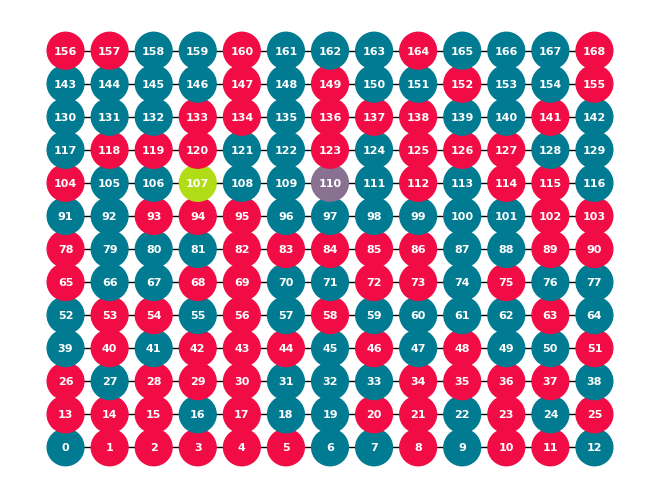

In [16]:
g, obstacles, start_pos, goal_pos = gg.build_grid(13)
obstacles_start = copy.deepcopy(obstacles)

In [4]:
num_iterations = 100
alpha = 0.9
beta = 1.5
theta = 100
num_ants = 50
rho = 0.9

# Brute Force:

In [5]:
metrics_bf = bf.find_path(g, start_pos, goal_pos, obstacles, num_iterations=num_iterations)

The minimum length of 145 was found in iteration 84
Time it took to finish the search: 1.654457
Obstacles moved: ['39->48', '68->78', '16->13', '50->60', '45->44', '90->81', '67->68', '90->91', '37->38', '3->12', '3->4', '58->47', '36->37', '38->29', '44->45', '12->11', '82->92', '37->36', '41->42', '93->83', '16->7', '62->61', '60->70', '4->14', '70->60', '68->69', '77->98', '81->71', '49->39', '77->67', '84->76', '39->28', '15->25', '42->33', '69->89', '1->0', '71->70', '84->95', '95->94', '65->75', '36->35', '91->90', '23->13', '26->27', '92->91', '16->17', '30->31', '84->85', '13->3', '35->46', '90->81', '29->19', '48->59', '83->84', '75->65', '16->15', '67->77', '94->93', '69->68', '61->51', '17->7', '15->26', '31->30', '30->40', '46->57', '14->4', '68->67', '3->2', '84->94', '27->17', '76->68', '77->75', '33->23', '4->3', '98->99', '26->25', '60->50', '2->12', '75->76', '90->71', '78->88', '76->66', '88->98', '17->16', '90->80', '25->26', '57->56', '71->61', '80->71', '26->5', '2

# Optimized brute

In [6]:
obstacles = copy.deepcopy(obstacles_start)
metrics_bfo = bfo.find_path(g, start_pos, goal_pos, obstacles, num_iterations=num_iterations)

The minimum length of 20 was found in iteration 85
Time it took to finish the search: 0.143161
Obstacles moved: ['30->40', '57->56', '32->22', '85->86', '58->59', '17->27', '87->88', '27->28', '82->92', '41->42', '37->47', '67->57', '1->2', '84->83', '92->82', '39->29', '80->70', '42->32', '15->25', '57->58', '88->87', '82->92', '59->69', '68->67', '62->63', '45->46', '90->80', '92->82', '47->57', '65->66', '83->84', '49->39', '40->41', '69->59', '25->15', '26->27', '3->13', '6->5', '50->51', '97->98', '29->19', '70->60', '46->47', '32->31', '14->4', '22->21', '75->76', '98->99', '4->14', '63->53', '31->30', '87->97', '15->25', '27->17', '80->81', '59->49', '17->27', '58->68', '86->87', '87->86', '47->48', '91->92', '16->15', '68->78', '86->96', '77->87', '76->86', '53->52', '81->71', '2->12', '14->24', '86->85', '28->29', '87->77', '51->50', '96->95', '48->47', '79->89', '99->98', '36->26', '41->31', '30->20', '50->51', '89->79', '82->81', '27->17', '92->91', '66->65', '43->44']
Best 

# ACO

In [15]:
for edge in g.edges:
        g.edges[edge]['pheromones'] = round(random.uniform(1e-3, 1e-2), 4)
        g.edges[edge]['weight'] = 1
    
obstacles = copy.deepcopy(obstacles_start)
metrics_aco = aco.aco(g, start_pos, goal_pos, num_ants, rho, num_iterations, theta, alpha, beta, obstacles)

Best score: 21
Time it took to finish the search: 0.357787
Obstacles moved: ['84->74', '80->81', '37->27', '91->92', '38->37']
Best path: [72, 71, 61, 51, 52, 53, 54, 55, 56, 46, 47, 48, 38, 28, 29, 19, 18]


# VNS

In [8]:
obstacles = copy.deepcopy(obstacles_start)
vns_params = {
    'time_limit': 2,
    'k_min': 1,
    'k_max': 3,
    'move_prob': 0.1,
}
solution, value = vns.vns(g, start_pos, goal_pos, obstacles, vns_params, num_iters = 10000)
print()
# result, result_value = vns.simulated_annealing(g, start_pos, goal_pos, obstacles, num_iters = 10000)

Najmanje pomeraja prepreka:  11
Obstacles moved: ['3->2', '75->76', '38->39']
Najbolji rezultat:  23
Time it took to finish the search: 73.030076



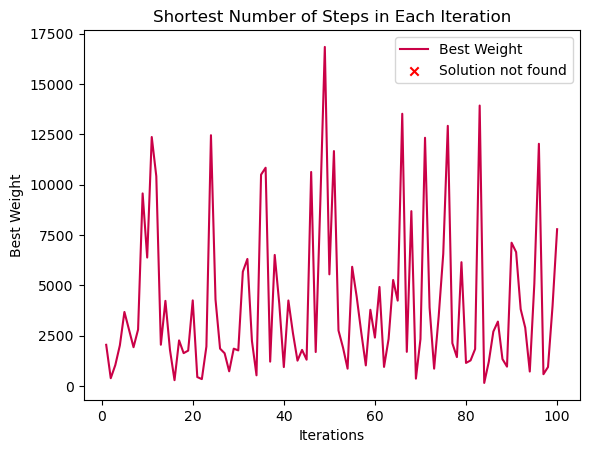

In [9]:
plot(num_iterations, metrics_bf["solution_values"])

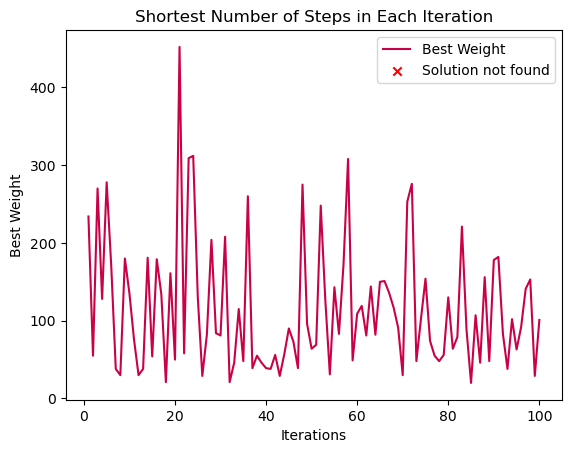

In [10]:
plot(num_iterations, metrics_bfo["solution_values"])

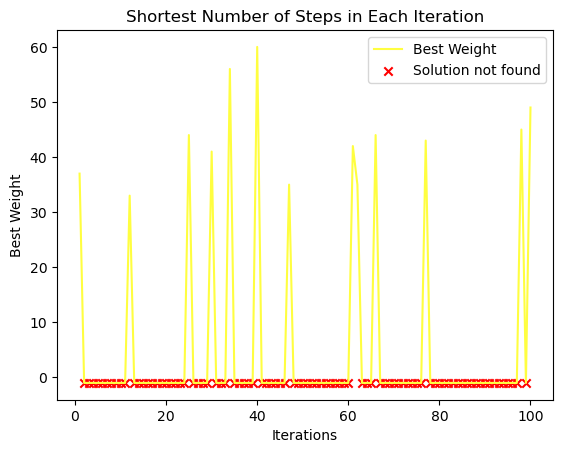

In [11]:
plot(num_iterations, metrics_aco["solution_values"])